In [1]:
!pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from textwrap import wrap
from collections import Counter
import tensorflow as tf
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
import pickle
import plotly.express as px
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.sequence import pad_sequences as pad
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
import seaborn
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import cufflinks as cf
import tensorflow
import keras
from tensorflow.keras import Sequential
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding
import os

In [3]:
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_excel('/content/drive/MyDrive/Research Work/Pathao Implementation/Dataset2/Bangla.xlsx')

In [6]:
file_path='/content/drive/MyDrive/Research Work/Pathao Implementation/Dataset2/Bangla.xlsx'

In [7]:
df.head()

,Sentiment,Class
0,আমি গত এক বছরে উবার ব্যবহার করেছি এবং দ্রুত সহ...,ইতিবাচক
1,"ভয়ঙ্কর পরিষেবা, উবার ড্রাইভাররা আপনাকে বাছাই ...",ইতিবাচক
2,আমার অ্যাপ্লিকেশন প্রায় সমস্ত সময় ক্র্যাশ হয...,নেতিবাচক
3,কোনও কারণে আমার কার্ডের সর্বদা একটি সমস্যা থাক...,ইতিবাচক
4,উবার একটি ভয়ানক অ্যাপ। তারা কেবল আপনাকে কাজে ...,নেতিবাচক


In [8]:
# df=df.drop(["Sentiment","Class"],axis=1)

In [9]:
df.columns=["Comments","sentiment"]

In [10]:
df.shape

(2549, 2)

In [11]:
df.sentiment.unique()

array(['ইতিবাচক', 'নেতিবাচক', 'নিরপেক্ষ'], dtype=object)

In [12]:
import pandas as pd

# Assuming you have a DataFrame called df with a column named 'Sentiment'
class_mapping = {'ইতিবাচক': 'Positive', 'নেতিবাচক': 'Negative', 'নিরপেক্ষ': 'Neutral'}

df['sentiment'] = df['sentiment'].replace(class_mapping)


In [13]:
df.sentiment.unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [14]:
print("Total Comment:",len(df),
      "\nTotal Negative :",len(df[df.sentiment =='Negative']),
      "\nTotal Neutral :",len(df[df.sentiment =='Neutral']),
      "\nTotal Positive :",len(df[df.sentiment=='Positive']))

Total Comment: 2549 
Total Negative : 856 
Total Neutral : 733 
Total Positive : 960


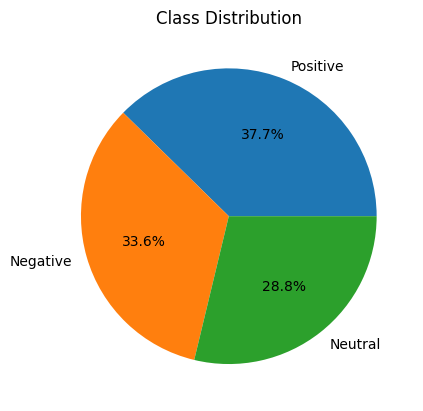

In [15]:
class_counts = df['sentiment'].value_counts()
class_percents = class_counts / class_counts.sum() * 100
# Plot the pie chart
plt.pie(class_percents, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.savefig("my_plot.png")
plt.show()

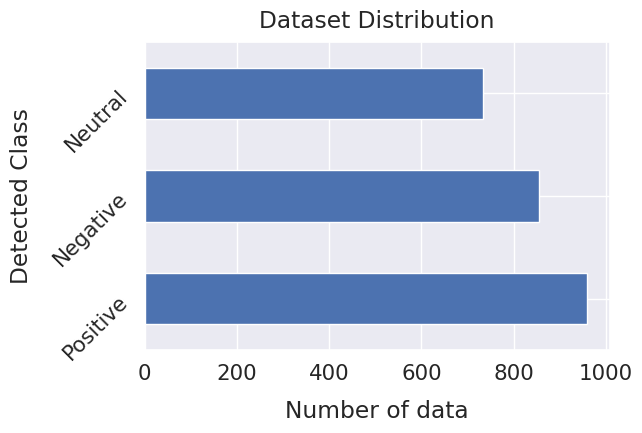

In [16]:
sns.set(font_scale=1.4)
df['sentiment'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of data", labelpad=12)
plt.ylabel("Detected Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);
plt.savefig("Dataset Distribution BarChart.png")

# **Most Common words**

In [17]:
category_list=df.sentiment.unique()
category_list

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [18]:
for i in category_list:
    temp=df.loc[df['sentiment'] == str(i)]
    #display(temp)
    temp['temp_list'] = df['Comments'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in temp['temp_list'] for item in sublist])
    temp = pd.DataFrame(top.most_common(20))
    temp.columns = ['Common_words','count']
    temp.style.background_gradient(cmap='Blues')
    temp = temp.style.set_caption('Top 20 Words In '+ str(i)+" Sentence")
    display(temp)

,Common_words,count
0,এবং,1444
1,আমি,1409
2,এটি,1040
3,জন্য,909
4,করে,818
5,আমার,782
6,করতে,716
7,একটি,684
8,তবে,678
9,বাতিল,641


,Common_words,count
0,এবং,1239
1,আমি,1136
2,এটি,783
3,জন্য,679
4,আমার,664
5,করে,641
6,করতে,568
7,একটি,506
8,কোনও,501
9,তবে,475


,Common_words,count
0,এবং,1066
1,আমি,1033
2,এটি,722
3,জন্য,637
4,করে,612
5,আমার,575
6,একটি,480
7,করতে,480
8,করার,433
9,তবে,424


In [19]:
df['temp_list'] = df['Comments'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,এবং,3749
1,আমি,3578
2,এটি,2545
3,জন্য,2225
4,করে,2071
5,আমার,2021
6,করতে,1764
7,একটি,1670
8,তবে,1577
9,করার,1524


In [20]:
# fig = px.bar(temp, x="count", y="Common_words", title='Top 20 Commmon Words', orientation='h',
#              width=700, height=700,color='Common_words')
# fig.show()

# **Dataset Summary**

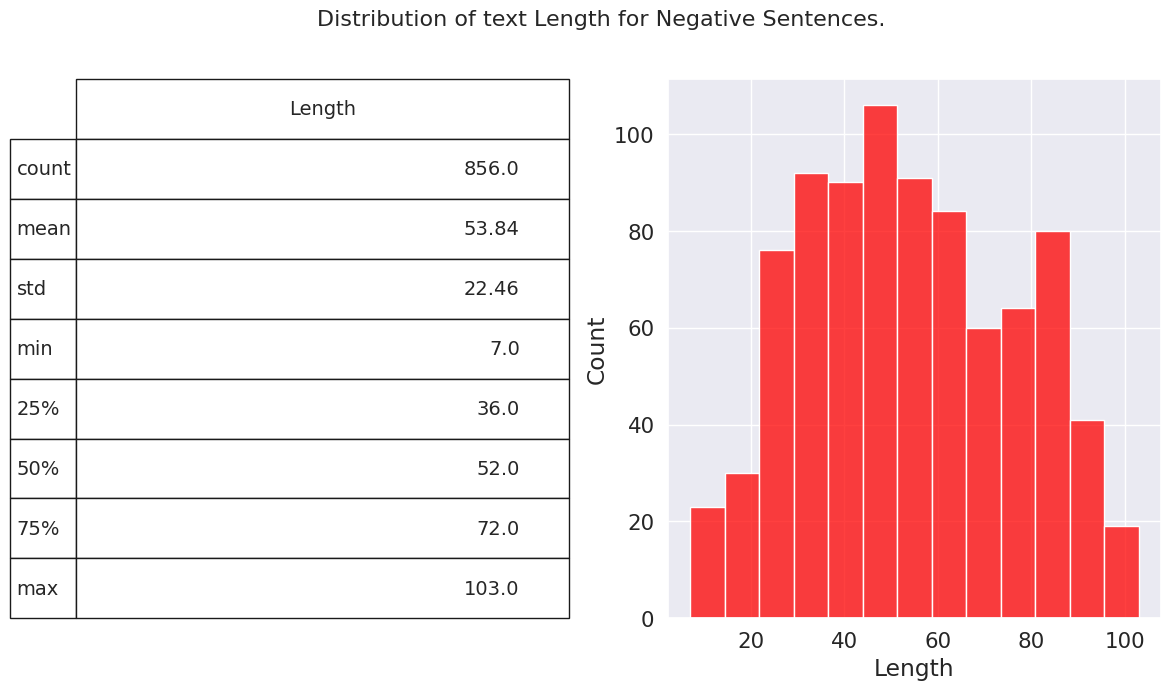

In [21]:
fig = plt.figure(figsize=(14,7))
df['Length'] = df.Comments.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']=='Negative']['Length'], ax=ax1,color='red')
describe = df.Length[df.sentiment=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text Length for Negative Sentences.', fontsize=16)

plt.show()

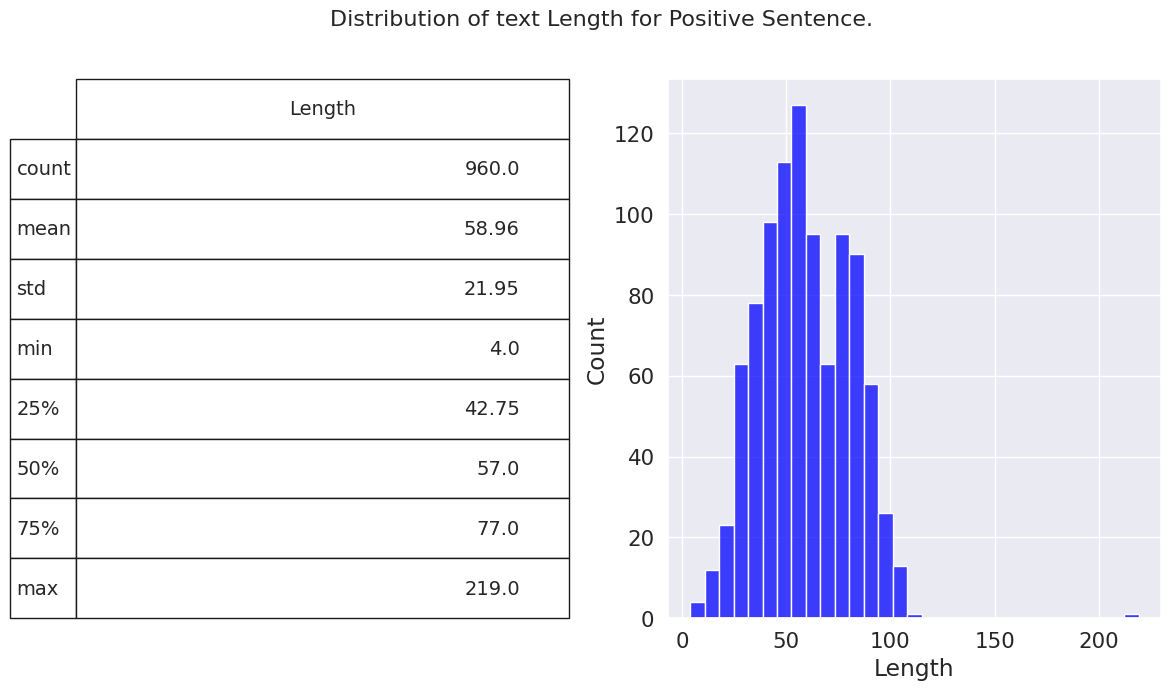

In [22]:
fig = plt.figure(figsize=(14,7))
df['Length'] = df.Comments.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']=='Positive']['Length'], ax=ax1,color='blue')
describe = df.Length[df.sentiment=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text Length for Positive Sentence.', fontsize=16)

plt.show()

In [23]:
def data_summary(dataset):

    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.Comments) for word in t.strip().split()]
    class_label= [k for k,v in dataset.sentiment.value_counts().to_dict().items()]

    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.sentiment==label].Comments) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        documents.append(len(list(dataset[dataset.sentiment==label].Comments)))
        words.append(len(word_list))
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.sentiment==label].Comments))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label
documents,words,u_words,class_names = data_summary(df)


Class Name :  Positive
Number of Documents:960
Number of Words:56605
Number of Unique Words:5648
Most Frequent Words:

এবং	1444
আমি	1409
এটি	1040
জন্য	909
করে	818
আমার	782
করতে	716
একটি	684
তবে	678
বাতিল	641

Class Name :  Negative
Number of Documents:856
Number of Words:46090
Number of Unique Words:5344
Most Frequent Words:

এবং	1239
আমি	1136
এটি	783
জন্য	679
আমার	664
করে	641
করতে	568
একটি	506
কোনও	501
তবে	475

Class Name :  Neutral
Number of Documents:733
Number of Words:41378
Number of Unique Words:5110
Most Frequent Words:

এবং	1066
আমি	1033
এটি	722
জন্য	637
করে	612
আমার	575
একটি	480
করতে	480
করার	433
তবে	424
Total Number of Unique Words:9583


In [24]:
data_matrix = pd.DataFrame({'Total Sentence':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
new_df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
print(new_df)

  Class Names        Category  Values
0    Positive  Total Sentence     960
1    Negative  Total Sentence     856
2     Neutral  Total Sentence     733
3    Positive     Total Words   56605
4    Negative     Total Words   46090
5     Neutral     Total Words   41378
6    Positive    Unique Words    5648
7    Negative    Unique Words    5344
8     Neutral    Unique Words    5110


In [25]:
def generate_wordcloud(data,title):
  data = [tuple(x) for x in data.values]
  wc = WordCloud(font_path="/content/drive/MyDrive/Simple Complex Compound/Font/kalpurush-2.ttf",width=1080, height=720, max_words=150,colormap="Dark2").generate_from_frequencies(dict(data))
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap("Word Cloud of "+title,60)),fontsize=13)
  plt.show()

In [26]:
new_df

,Class Names,Category,Values
0,Positive,Total Sentence,960
1,Negative,Total Sentence,856
2,Neutral,Total Sentence,733
3,Positive,Total Words,56605
4,Negative,Total Words,46090
5,Neutral,Total Words,41378
6,Positive,Unique Words,5648
7,Negative,Unique Words,5344
8,Neutral,Unique Words,5110


In [27]:
sample_data = [4,52,710,940]
for i in sample_data:
      print(df.Comments[i],'\n','Detacted as:-- ',df.sentiment[i],'\n')

উবার একটি ভয়ানক অ্যাপ। তারা কেবল আপনাকে কাজে লাগাতে চায়। অ্যাপ্লিকেশনটি দীর্ঘতম রুটটি সম্ভব দেখায়। এটি আমার সাথে দ্বিতীয়বার ঘটেছে। আসলে এটি প্রতিদিন ঘটে। তবে যেহেতু আমি ব্যস্ত ছিলাম আমি ড্রাইভারকে আসল রুট নিতে বলতে ভুলে গিয়েছিলাম এবং ড্রাইভারটি রাউ নিয়েছিল ... 
 Detacted as:--  Negative 

সবচেয়ে খারাপ অভিজ্ঞতা। আমি প্রতিদিন অফিসে যাওয়ার জন্য প্রতিদিন উবার ব্যবহার করি। আমি যখনই উবার বুক করি তখন এটি বলে যে ড্রাইভারটি 5-7 মিনিটের মধ্যে পৌঁছেছে। যাইহোক, উল্লিখিত সময়ের চেয়ে বেশি অপেক্ষা করার পরেও কেউ আসে না। আমি কেবল অ্যাপটি খুলি যে ড্রাইভারটি আমার যাত্রা বাতিল করেছে। অ্যাপটি আরআই বুকিং শুরু করে ... 
 Detacted as:--  Positive 

আপনার অ্যাকাউন্টে আপনার ফোন নম্বরটি হারাবেন না। সবেমাত্র একটি নতুন নম্বর সহ একটি নতুন ফোন পেয়েছি। এটি আমার পুরানো নম্বর ছাড়া আর উপস্থিত নেই যা আমাকে লগইন করতে দেয় না। কেন তাদের জিনিস লগইন করা এত কঠিন করে তুলতে হবে। আমি জানি না। আমি একটি টিপিং গ্রাহক। তবে তারা আমাকে কেবল হারিয়েছে। আমি যদি আমার অ্যাকাউন্টে লগইন করতে না পারি তবে পরিষেবা ব্যবহার করতে পারি ন

df.head()

In [28]:
df['cleaned'] = df['Comments'].apply(lambda x: x.replace('\n', ' '))

In [29]:
df.head()

,Comments,sentiment,temp_list,Length,cleaned
0,আমি গত এক বছরে উবার ব্যবহার করেছি এবং দ্রুত সহ...,Positive,"[আমি, গত, এক, বছরে, উবার, ব্যবহার, করেছি, এবং,...",52,আমি গত এক বছরে উবার ব্যবহার করেছি এবং দ্রুত সহ...
1,"ভয়ঙ্কর পরিষেবা, উবার ড্রাইভাররা আপনাকে বাছাই ...",Positive,"[ভয়ঙ্কর, পরিষেবা,, উবার, ড্রাইভাররা, আপনাকে, ...",65,"ভয়ঙ্কর পরিষেবা, উবার ড্রাইভাররা আপনাকে বাছাই ..."
2,আমার অ্যাপ্লিকেশন প্রায় সমস্ত সময় ক্র্যাশ হয...,Negative,"[আমার, অ্যাপ্লিকেশন, প্রায়, সমস্ত, সময়, ক্র্...",63,আমার অ্যাপ্লিকেশন প্রায় সমস্ত সময় ক্র্যাশ হয...
3,কোনও কারণে আমার কার্ডের সর্বদা একটি সমস্যা থাক...,Positive,"[কোনও, কারণে, আমার, কার্ডের, সর্বদা, একটি, সমস...",62,কোনও কারণে আমার কার্ডের সর্বদা একটি সমস্যা থাক...
4,উবার একটি ভয়ানক অ্যাপ। তারা কেবল আপনাকে কাজে ...,Negative,"[উবার, একটি, ভয়ানক, অ্যাপ।, তারা, কেবল, আপনাক...",42,উবার একটি ভয়ানক অ্যাপ। তারা কেবল আপনাকে কাজে ...


# **Data Preperation and Cleaning**

# **Data Preperation and Preprocessing Step**

This Step Will Apply Over The Dataset
```
1.Convert Datatypes
2.Null Value Handle
3. Remove Dupliate Row
4. Remove Small Text
5. Remove Puncuatoion,Link,Emoji(No Character)
6. Remove Non bengali Character
7. Stopwords
8. Stemming
9. Sampling (Upper Samling and Downsampling)

```



In [30]:
df.head()

,Comments,sentiment,temp_list,Length,cleaned
0,আমি গত এক বছরে উবার ব্যবহার করেছি এবং দ্রুত সহ...,Positive,"[আমি, গত, এক, বছরে, উবার, ব্যবহার, করেছি, এবং,...",52,আমি গত এক বছরে উবার ব্যবহার করেছি এবং দ্রুত সহ...
1,"ভয়ঙ্কর পরিষেবা, উবার ড্রাইভাররা আপনাকে বাছাই ...",Positive,"[ভয়ঙ্কর, পরিষেবা,, উবার, ড্রাইভাররা, আপনাকে, ...",65,"ভয়ঙ্কর পরিষেবা, উবার ড্রাইভাররা আপনাকে বাছাই ..."
2,আমার অ্যাপ্লিকেশন প্রায় সমস্ত সময় ক্র্যাশ হয...,Negative,"[আমার, অ্যাপ্লিকেশন, প্রায়, সমস্ত, সময়, ক্র্...",63,আমার অ্যাপ্লিকেশন প্রায় সমস্ত সময় ক্র্যাশ হয...
3,কোনও কারণে আমার কার্ডের সর্বদা একটি সমস্যা থাক...,Positive,"[কোনও, কারণে, আমার, কার্ডের, সর্বদা, একটি, সমস...",62,কোনও কারণে আমার কার্ডের সর্বদা একটি সমস্যা থাক...
4,উবার একটি ভয়ানক অ্যাপ। তারা কেবল আপনাকে কাজে ...,Negative,"[উবার, একটি, ভয়ানক, অ্যাপ।, তারা, কেবল, আপনাক...",42,উবার একটি ভয়ানক অ্যাপ। তারা কেবল আপনাকে কাজে ...


In [31]:
df.drop(["Comments","temp_list","Length"],inplace=True,axis=1)

# **1.Convert Datatypes**

In [32]:
print(type(df['cleaned'][0]))

<class 'str'>


In [33]:
df['cleaned'] = df['cleaned'].apply(lambda x: str(x))

In [34]:
df.dtypes

sentiment    object
cleaned      object
dtype: object

# **2.Null Value Handle**

In [35]:
df.isnull().sum()

sentiment    0
cleaned      0
dtype: int64

# **Removing Duplicate Rows**

In [36]:
df.shape

(2549, 2)

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df.shape

(2335, 2)

# **4.Remove Small Text**

In [39]:
df.shape

(2335, 2)

In [40]:
df.head()

,sentiment,cleaned
0,Positive,আমি গত এক বছরে উবার ব্যবহার করেছি এবং দ্রুত সহ...
1,Positive,"ভয়ঙ্কর পরিষেবা, উবার ড্রাইভাররা আপনাকে বাছাই ..."
2,Negative,আমার অ্যাপ্লিকেশন প্রায় সমস্ত সময় ক্র্যাশ হয...
3,Positive,কোনও কারণে আমার কার্ডের সর্বদা একটি সমস্যা থাক...
4,Negative,উবার একটি ভয়ানক অ্যাপ। তারা কেবল আপনাকে কাজে ...


In [41]:
df['no_char'] = df['cleaned'].apply(lambda Sentence: len(Sentence))

In [42]:
df['length'] = df['cleaned'].apply(lambda x:len(x.split()))

In [43]:
dataset = df.loc[df.length>3]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small conversations".format(len(df)-len(dataset)),
      "\nTotal conversations:",len(dataset))

After Cleaning: 
Removed 1 Small conversations 
Total conversations: 2334


In [44]:
dataset.shape

(2334, 4)

# **4.Remove Non Character Word**

In [45]:
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

dataset["Sentence"] = dataset["cleaned"].apply(lambda text: remove_punctuation(text))
dataset.head()

,sentiment,cleaned,no_char,length,Sentence
0,Positive,আমি গত এক বছরে উবার ব্যবহার করেছি এবং দ্রুত সহ...,314,52,আমি গত এক বছরে উবার ব্যবহার করেছি এবং দ্রুত সহ...
1,Positive,"ভয়ঙ্কর পরিষেবা, উবার ড্রাইভাররা আপনাকে বাছাই ...",426,65,ভয়ঙ্কর পরিষেবা উবার ড্রাইভাররা আপনাকে বাছাই ক...
2,Negative,আমার অ্যাপ্লিকেশন প্রায় সমস্ত সময় ক্র্যাশ হয...,354,63,আমার অ্যাপ্লিকেশন প্রায় সমস্ত সময় ক্র্যাশ হয...
3,Positive,কোনও কারণে আমার কার্ডের সর্বদা একটি সমস্যা থাক...,337,62,কোনও কারণে আমার কার্ডের সর্বদা একটি সমস্যা থাক...
4,Negative,উবার একটি ভয়ানক অ্যাপ। তারা কেবল আপনাকে কাজে ...,266,42,উবার একটি ভয়ানক অ্যাপ। তারা কেবল আপনাকে কাজে ...


In [46]:
df.drop(["no_char","length"],axis=1,inplace=True)

In [47]:
df.head()

,sentiment,cleaned
0,Positive,আমি গত এক বছরে উবার ব্যবহার করেছি এবং দ্রুত সহ...
1,Positive,"ভয়ঙ্কর পরিষেবা, উবার ড্রাইভাররা আপনাকে বাছাই ..."
2,Negative,আমার অ্যাপ্লিকেশন প্রায় সমস্ত সময় ক্র্যাশ হয...
3,Positive,কোনও কারণে আমার কার্ডের সর্বদা একটি সমস্যা থাক...
4,Negative,উবার একটি ভয়ানক অ্যাপ। তারা কেবল আপনাকে কাজে ...


# **6. Remove Non bengali Character**

In [48]:
import re

# Define a regular expression pattern to match Bengali characters and spaces
bengali_pattern = re.compile("[\u0980-\u09FF ]+")

# Function to remove non-Bengali characters from a string
def remove_non_bengali_chars(text):
    return "".join(filter(bengali_pattern.match, text))

# Apply the function to each element in your dataset
dataset['Bengali_Text'] = dataset['Sentence'].apply(remove_non_bengali_chars)


In [49]:
dataset.head()

,sentiment,cleaned,no_char,length,Sentence,Bengali_Text
0,Positive,আমি গত এক বছরে উবার ব্যবহার করেছি এবং দ্রুত সহ...,314,52,আমি গত এক বছরে উবার ব্যবহার করেছি এবং দ্রুত সহ...,আমি গত এক বছরে উবার ব্যবহার করেছি এবং দ্রুত সহ...
1,Positive,"ভয়ঙ্কর পরিষেবা, উবার ড্রাইভাররা আপনাকে বাছাই ...",426,65,ভয়ঙ্কর পরিষেবা উবার ড্রাইভাররা আপনাকে বাছাই ক...,ভয়ঙ্কর পরিষেবা উবার ড্রাইভাররা আপনাকে বাছাই ক...
2,Negative,আমার অ্যাপ্লিকেশন প্রায় সমস্ত সময় ক্র্যাশ হয...,354,63,আমার অ্যাপ্লিকেশন প্রায় সমস্ত সময় ক্র্যাশ হয...,আমার অ্যাপ্লিকেশন প্রায় সমস্ত সময় ক্র্যাশ হয...
3,Positive,কোনও কারণে আমার কার্ডের সর্বদা একটি সমস্যা থাক...,337,62,কোনও কারণে আমার কার্ডের সর্বদা একটি সমস্যা থাক...,কোনও কারণে আমার কার্ডের সর্বদা একটি সমস্যা থাক...
4,Negative,উবার একটি ভয়ানক অ্যাপ। তারা কেবল আপনাকে কাজে ...,266,42,উবার একটি ভয়ানক অ্যাপ। তারা কেবল আপনাকে কাজে ...,উবার একটি ভয়ানক অ্যাপ তারা কেবল আপনাকে কাজে ল...


In [50]:
dataset.drop(["no_char","length","cleaned","Sentence"],axis=1,inplace=True)

# **7.Removing stopwords**

In [51]:
def process_conversations(Conversation):
    stp = open('/content/drive/MyDrive/Research Work/Pathao Implementation/Stopwords.txt','r',encoding="utf8").read().split()
    result = Conversation.split()
    Conversation = [word.strip() for word in result if word not in stp ]
    Conversation =" ".join(Conversation)
    Conversation = re.sub('[^\u0980-\u09FF]',' ',str(Conversation))
    return Conversation

In [52]:
dataset['cleaned'] = dataset['Bengali_Text'].apply(process_conversations)
sample_data = [10,400]
for i in sample_data:
     print('Original:\n',dataset.Bengali_Text[i],'\nCleaned:\n',
           dataset.cleaned[i],'\n','Detected as:-- ',dataset.sentiment[i],'\n')

Original:
 তারা সত্যিই মরিয়া না হলে কারও কাছে এটির সুপারিশ করবেন না এটি কারণ  নেভিগেটর ড্রাইভারদের গন্তব্যগুলির পিছনে নিয়ে যায় যা কখনও কখনও খুব বিপজ্জনক গলি হয় ২ যদি আমি ড্রাইভারকে সঠিক রাস্তায় পরিচালনা করি তবে অ্যাপটি তাদের ট্রিপটি এটি সম্পূর্ণ করতে লগ করার অনুমতি দেবে না ৩ এটি আমাকে কখনই সোজা বাড়িতে নিয়ে যায় না তবে ড্রাইভারকে কেবল তাদের গাড়ি চালানোর জায়গাটিতে একটি ইউটার্ন তৈরি করার জন্য গাড়ি চালাতে বলে ৪ স্বাস্থ্য রিসোর জন্য কোনও ধূমপান ড্রাইভার বিকল্প যুক্ত করা উচিত 
Cleaned:
 সত্যিই মরিয়া এটির সুপারিশ নেভিগেটর ড্রাইভারদের গন্তব্যগুলির পিছনে বিপজ্জনক গলি ২ ড্রাইভারকে সঠিক রাস্তায় পরিচালনা অ্যাপটি ট্রিপটি সম্পূর্ণ লগ অনুমতি দেবে ৩ কখনই সোজা বাড়িতে ড্রাইভারকে কেবল গাড়ি চালানোর জায়গাটিতে ইউটার্ন তৈরি গাড়ি চালাতে ৪ স্বাস্থ্য রিসোর ধূমপান ড্রাইভার বিকল্প যুক্ত 
 Detected as:--  Negative 

Original:
 আমি জানি না এই অ্যাপ্লিকেশনটিতে কী সমস্যা আমি যখন একটি ক্যাব বুক করতে ব্যবহার করি তখন এটি কিছু এক্সওয়াইজেড দাম দেখায় এবং পরে ড্রাইভার আমাকে কল করে এবং আমাদের ড্রপের অবস্থান

In [53]:
dataset.head()

,sentiment,Bengali_Text,cleaned
0,Positive,আমি গত এক বছরে উবার ব্যবহার করেছি এবং দ্রুত সহ...,গত এক বছরে উবার করেছি দ্রুত সহজ যাত্রা উপভোগ ক...
1,Positive,ভয়ঙ্কর পরিষেবা উবার ড্রাইভাররা আপনাকে বাছাই ক...,ভয়ঙ্কর পরিষেবা উবার ড্রাইভাররা আপনাকে বাছাই ড...
2,Negative,আমার অ্যাপ্লিকেশন প্রায় সমস্ত সময় ক্র্যাশ হয...,অ্যাপ্লিকেশন সময় ক্র্যাশ বার্তা পেয়েছি উফ ভু...
3,Positive,কোনও কারণে আমার কার্ডের সর্বদা একটি সমস্যা থাক...,কারণে কার্ডের সর্বদা সমস্যা কার্ডটি ভ্রমণের অর...
4,Negative,উবার একটি ভয়ানক অ্যাপ তারা কেবল আপনাকে কাজে ল...,উবার ভয়ানক অ্যাপ কেবল আপনাকে লাগাতে অ্যাপ্লিক...


In [54]:
dataset.drop(["Bengali_Text"],axis=1,inplace=True)

# **8.Stemming**

In [55]:
!pip install bangla-stemmer

In [56]:
from bangla_stemmer.stemmer import stemmer
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

In [57]:
dataset['cleaned']=dataset['cleaned'].apply(stem_text)

Streaming output truncated to the last 5000 lines.
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied third rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules.

In [58]:
# dataset.drop(["cleaned"],axis=1,inplace=True)

# **Label Encoding Function**

In [59]:
def label_encoding(df,bool):
  le = LabelEncoder()
  le.fit(df.sentiment)
  encoded_labels = le.transform(df.sentiment)
  labels = np.array(encoded_labels) # Converting into numpy array
  class_names =le.classes_ ## Define the class names again
  if bool == True:
    print(color.BOLD+"\n\t\t\t===== Label Encoding ====="+color.END,"\nClass Names:-->",le.classes_)
  return labels

def dataset_split(news,Label):
  '''
  This function will split the dataset into Train-Test-Validation set
  '''

  X,X_test,y,y_test = train_test_split(news,Label,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
  X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
  print(color.BOLD+"Feature Size :======>"+color.END,X_train.shape[1])
  print(color.BOLD+"\nDataset Distribution:\n"+color.END)
  print("\tSet Name","\t\tSize")
  print("\t========\t\t======")

  print("\tFull\t\t\t",news.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0],
        "\n\tValidation\t\t",X_valid.shape[0])

  return X_train,X_valid,X_test,y_train,y_valid,y_test

In [60]:
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [61]:
df.head()

,sentiment,cleaned
0,Positive,আমি গত এক বছরে উবার ব্যবহার করেছি এবং দ্রুত সহ...
1,Positive,"ভয়ঙ্কর পরিষেবা, উবার ড্রাইভাররা আপনাকে বাছাই ..."
2,Negative,আমার অ্যাপ্লিকেশন প্রায় সমস্ত সময় ক্র্যাশ হয...
3,Positive,কোনও কারণে আমার কার্ডের সর্বদা একটি সমস্যা থাক...
4,Negative,উবার একটি ভয়ানক অ্যাপ। তারা কেবল আপনাকে কাজে ...


In [62]:
from wordcloud import WordCloud
from textwrap import wrap

import matplotlib.pyplot as plt
from matplotlib import font_manager

# Function for generating word clouds
def generate_wordcloud(data,title):
  data = [tuple(x) for x in data.values]
  wc = WordCloud(font_path="/content/drive/MyDrive/Simple Complex Compound/Font/kalpurush-2.ttf",width=1080, height=720, max_words=150,colormap="Dark2").generate_from_frequencies(dict(data))
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap("Word Cloud of "+title,60)),fontsize=13)
  plt.show()

In [63]:
dataset.head()

,sentiment,cleaned
0,Positive,গত এক বছরে উব করে দ্রুত সহজ যাত্ উপভোগ করে যাহ...
1,Positive,ভয়ঙ্কর পরিষেবা উব ড্রাইভাররা আপনা বাছা ড্রাইভ...
2,Negative,অ্যাপ্লিকেশন সময় ক্র্যাশ বার্তা পেয়ে উফ ভুল ...
3,Positive,কারণে কার্ড সর্বদা সমস্যা কার্ডটি ভ্রমণ অর্থ প...
4,Negative,উব ভয়ানক অ্যাপ কেবল আপনা লাগা অ্যাপ্লিকেশনটি ...


In [64]:
dataset.columns=["sentiment","cleaned"]

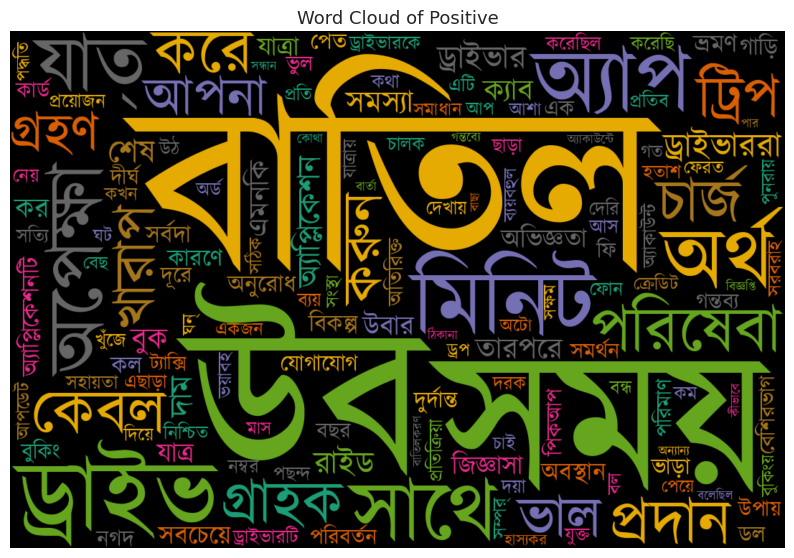

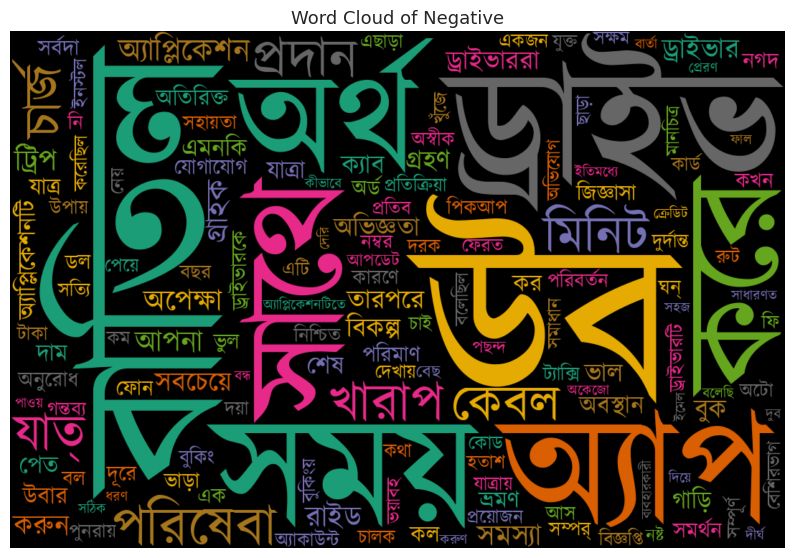

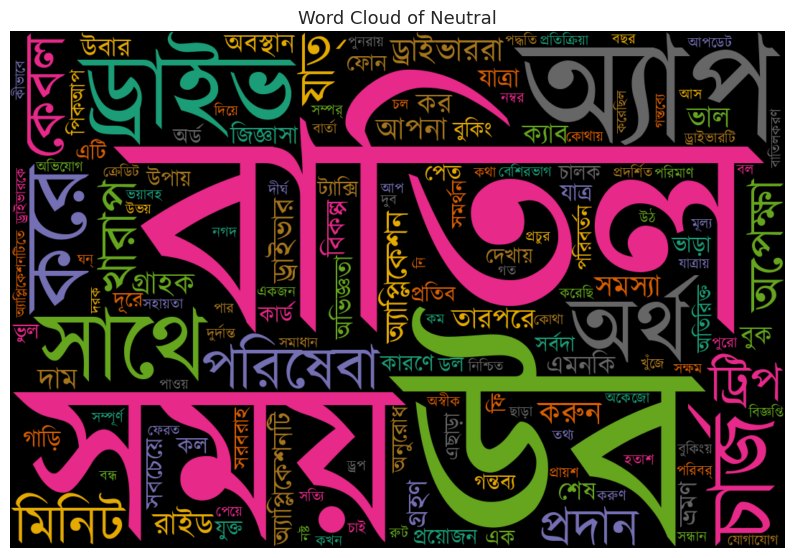

In [65]:
for i in category_list:
    temp=dataset.loc[dataset['sentiment'] == str(i)]
    #display(temp)
    temp['temp_list'] = dataset['cleaned'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in temp['temp_list'] for item in sublist])
    temp = pd.DataFrame(top.most_common(500000))
    temp.columns = ['Common_words','count']
    generate_wordcloud(temp,str(i))

In [66]:
def encoded_texts(dataset,padding_length,max_words):

  tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n-',
                      split=' ', char_level=False, oov_token='', document_count=0)
  tokenizer.fit_on_texts(df.cleaned)
  (word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
  def tokenizer_info(mylist,bool):
    ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool)
    for w,c in ordered[:10]:
      print(w,"\t",c)
  print(color.BOLD+"\t\t\t====== Tokenizer Info ======"+color.END)
  print("Words --> Counts:")
  tokenizer_info(word_counts,bool =True )
  print("\nWords --> Documents:")
  tokenizer_info(word_docs,bool =True )
  print("\nWords --> Index:")
  tokenizer_info(word_index,bool =True )
  print("\nTotal Documents -->",document_count)

  #=========================== Convert string into list of integer indices =================
  sequences = tokenizer.texts_to_sequences(df.cleaned)
  word_index = tokenizer.word_index
  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\nFound {} unique tokens".format(len(word_index)))
  print(df.cleaned[10],"\n",sequences[10])

  #==================================== Pad Sequences ==============================
  corpus = pad(sequences, value=0.0,
                                                      padding='post', maxlen= padding_length)
  print("\n\t\t\t====== Paded Sequences ======\n",df.cleaned[10],"\n",corpus[10])

  #=================================     Label Encoding ================================
  labels = label_encoding(df,True)

   # save the tokenizer into a pickle file
  with open(file_path+'tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

  return corpus,labels

#call the function
num_words = 5000
corpus,labels = encoded_texts(df,
                                300,num_words)
print("\nShape of Encoded Corpus =====>",corpus.shape)

			====== Tokenizer Info ======
Words --> Counts:
এবং 	 3470
আমি 	 3356
এটি 	 2362
জন্য 	 2063
করে 	 2004
আমার 	 1881
করতে 	 1626
না 	 1600
একটি 	 1556
তবে 	 1480

Words --> Documents:
এবং 	 1733
আমি 	 1463
এটি 	 1357
জন্য 	 1294
করে 	 1210
না 	 1082
তবে 	 1081
করতে 	 1067
আমার 	 1062
একটি 	 1054

Words --> Index:
তারাটি 	 7878
অবলম্বনকারী 	 7877
মাথাব্যথা 	 7876
পরেছি। 	 7875
ঘাবড়ে 	 7874
তাই। 	 7873
প্রাক্কলনটিও 	 7872
বাল্মযুক্ত 	 7871
বিরতিযুক্ত 	 7870
দ্রুততর 	 7869

Total Documents --> 2335

			====== Encoded Sequences ====== 
Found 7878 unique tokens
তারা সত্যিই মরিয়া না হলে কারও কাছে এটির সুপারিশ করবেন না। এটি কারণ: 1. নেভিগেটর ড্রাইভারদের গন্তব্যগুলির পিছনে নিয়ে যায় যা কখনও কখনও খুব বিপজ্জনক গলি হয়। ২. যদি আমি ড্রাইভারকে সঠিক রাস্তায় পরিচালনা করি তবে অ্যাপটি তাদের ট্রিপটি এটি সম্পূর্ণ করতে লগ করার অনুমতি দেবে না। ৩. এটি আমাকে কখনই সোজা বাড়িতে নিয়ে যায় না তবে ড্রাইভারকে কেবল তাদের গাড়ি চালানোর জায়গাটিতে একটি ইউ-টার্ন তৈরি করার জন্য গাড়ি চালাতে বলে। ৪. স্বাস্থ্য রিসো

# **Label Encoding Function**

In [67]:
def label_encoding(sentiment,bool):

    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels)
    class_names =le.classes_
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels


In [68]:
def dataset_split(feature_space,sentiment):

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])

    return X_train,X_test,y_train,y_test

In [69]:
def calc_gram_tfidf(Conversations):
    tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split())
    X = tfidf.fit_transform(Conversations)

    return tfidf,X

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [71]:
def ml_models_defination():

    lr_model = LogisticRegression()
    dt_model = DecisionTreeClassifier()
    rf_model = RandomForestClassifier()
    mnb_model = MultinomialNB(alpha=0.12)
    knn_model = KNeighborsClassifier(n_neighbors=3)
    svm_model = SVC(kernel = 'linear', C=1.01, degree=1, gamma='auto')
    sgd_model = SGDClassifier(loss = 'log',penalty='l2', max_iter=5)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','SVM','sgd']

    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,svm_model,sgd_model]

    return ml_models,model_names

In [72]:
def model_performance(model, X_train, X_test, y_train, y_test):
    my_dict = {}
    model.fit(X_train, y_train)

    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y), 4) * 100
    my_dict['Precision'] = round(precision_score(y_test, pred_y, average='weighted'), 4) * 100
    my_dict['Recall'] = round(recall_score(y_test, pred_y, average='weighted'), 4) * 100
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y, average='weighted'), 4) * 100

    return my_dict


In [73]:
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []

    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    model_names = ['Logistic Regression','Decision Tree','Random Forest','Multi. Naive Bayes','KNN','SVM','SGD']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,'Model Name':model_names })
    return performance_df

In [74]:
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]

for i,gram in enumerate(ngrams):
     tfidf,feature = calc_gram_tfidf(dataset.cleaned)
     labels = label_encoding(dataset.sentiment,False)
     X_train,X_test,y_train,y_test = dataset_split(feature,labels)
     ml_models,model_names = ml_models_defination()
     accuracy = {f'{model_names[j]}': model_performance(model, X_train, X_test, y_train, y_test) for j, model in enumerate(ml_models)}

     with open(f'ml_performance_{gram_names[i]}.json', 'w') as f:
           json.dump(accuracy,f)

Feature Size :======> 93905

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2334 
	Training		 1867 
	Test			 467
Feature Size :======> 93905

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2334 
	Training		 1867 
	Test			 467
Feature Size :======> 93905

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2334 
	Training		 1867 
	Test			 467


In [75]:
table = performance_table(accuracy)
df3 =pd.DataFrame(table)
table

,Accuracy,Precision,Recall,F1 Score,Model Name
0,39.19,38.75,39.19,33.70,Logistic Regression
1,36.19,36.19,36.19,35.97,Decision Tree
2,39.83,39.44,39.83,37.37,Random Forest
3,35.76,35.47,35.76,35.19,Multi. Naive Bayes
4,38.12,37.76,38.12,37.57,KNN
5,40.26,39.82,40.26,37.98,SVM
6,40.26,40.02,40.26,38.37,SGD
